In [80]:
import numpy as np
from neuraltda import SLSEMetric as slse
import neuraltda.Annealer as an
reload(an)

<module 'neuraltda.Annealer' from '/home/brad/code/NeuralTDA/neuraltda/Annealer.pyc'>

In [ ]:
myslse = slse.SLSEMetric([], 1, 13.0)

In [ ]:
myslse.error([], 1)

In [2]:
class simplesys:
    
    def __init__(self, center):
        self.center = center
        
    def initialize(self):
        return 100*np.random.randn()
    
    def run(self, s):
        return s
    
class sqloss:
    
    def __init__(self, center):
        self.center = center
        
    def error(self, x):
        return (self.center - x)**2

In [ ]:
sys = simplesys(4)
loss = sqloss(3.5)
annealer = an.Annealer(loss, sys, 0.001)

In [ ]:
annealer.anneal(10000)

In [3]:
import brian2
%matplotlib inline

In [ ]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='linear')
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2])
S.w = 'j*0.2'

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], '-b', label='Neuron 0')
plot(M.t/ms, M.v[1], '-g', lw=2, label='Neuron 1')
plot(M.t/ms, M.v[2], '-r', lw=2, label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend(loc='best');

In [ ]:
start_scope()

N = 25
tau = 10*ms
v0_max = 3.
duration = 4000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')
M = SpikeMonitor(G)

G.v0 = 0.7

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(p=0.1)
S.w = 'randn()'
S.delay = 1*ms

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');



In [52]:
import pandas as pd
class SpikingNetwork:
    fs = 40000
    N = 25
    tau = 10*brian2.ms
    v0_max = 3.
    duration = 4000*brian2.ms
    sigma = 0.2
    
    def __init__(self):
        brian2.start_scope()
        
        eqs = '''
        dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
        v0 : 1
        tau : second
        sigma : 1
        '''

        self.G = brian2.NeuronGroup(self.N, eqs, threshold='v>1', reset='v=0', refractory=5*brian2.ms, method='euler')
        self.M = brian2.SpikeMonitor(self.G)

        self.G.v0 = 0.7
        self.G.tau = self.tau
        self.G.sigma=self.sigma
        # Comment these two lines out to see what happens without Synapses
        self.S = brian2.Synapses(self.G, self.G, 'w : 1', on_pre='v_post += w')
        self.S.connect(p=0.1)
        self.S.w = 'randn()'
        self.S.delay = 1*brian2.ms
        
        self.net = brian2.Network()
        self.net.add(self.G, self.M, self.S)
        
    def initialize(self):
        return np.array(self.S.w)
    
    def run(self, weights=None):
        if weights:
            self.S.w = weights
        self.net.run(self.duration)
        sptrains = self.M.spike_trains()
        spikes = pd.DataFrame(data={'cluster': self.M.i, 'time_samples': np.int_(np.array(self.M.t)*self.fs), 'recording': len(self.M.t)*[0]})
        spikes = spikes.sort(columns='time_samples')
        stim_trials = pd.DataFrame(data={'time_samples': [0], 'stimulus_end': [float(self.duration)]})
        clusters_list = range(self.N)
        
        return spikes

In [11]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

In [ ]:
visualise_connectivity(S)

In [ ]:
S.w = np.random.standard_normal(np.shape(S.w))

In [ ]:
S.w

In [ ]:
np.array(S.w)

In [ ]:
len(M.t)

In [98]:
import neuraltda.SpikingNetwork as sn
reload(sn)

<module 'neuraltda.SpikingNetwork' from '/home/brad/code/NeuralTDA/neuraltda/SpikingNetwork.py'>

In [84]:
t1 = sn.SpikingNetwork(10.0, 5.0)

In [85]:
test = t1.run()

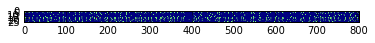

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(test[:, :, 0])

In [357]:
import neuraltda.simpComp as sc
reload(slse)
reload(sn)
reload(an)



<module 'neuraltda.Annealer' from '/home/brad/code/NeuralTDA/neuraltda/Annealer.py'>

In [363]:
targ = sc.simplicialChainGroups([(1,2,3), (2,3,4), (1,4,7,9), (3,9)])
loss = slse.SLSEMetric(targ, 1, 6.0)
sys = sn.SpikingNetwork(10.0, 5.0)
annealer = an.Annealer(loss, sys, 5.0, 20)

In [364]:
annealer.anneal(1000)

0
Status: 0/1000, E: inf, E_new: 0.0718825680899, Temp: 1.0
0
Status: 0/1000, E: 0.0718825680899, E_new: 0.0718825680899, Temp: 1.0
0
Status: 0/1000, E: 0.0718825680899, E_new: 0.0718825680899, Temp: 1.0
0
Status: 0/1000, E: 0.0718825680899, E_new: 0.118019216918, Temp: 1.0
0
Status: 0/1000, E: 0.118019216918, E_new: 0.102397533841, Temp: 1.0
0
Status: 1/1000, E: 0.102397533841, E_new: 0.0925778687114, Temp: 0.99
0
Status: 1/1000, E: 0.0925778687114, E_new: 0.0925778687114, Temp: 0.99
0
Status: 1/1000, E: 0.0925778687114, E_new: 0.0925778687114, Temp: 0.99
0
Status: 1/1000, E: 0.0925778687114, E_new: 0.139141142124, Temp: 0.99
0
Status: 1/1000, E: 0.139141142124, E_new: 0.0925778687114, Temp: 0.99
0
Status: 2/1000, E: 0.0925778687114, E_new: 0.139141142124, Temp: 0.9801
0
Status: 2/1000, E: 0.139141142124, E_new: 0.0925778687114, Temp: 0.9801
0
Status: 2/1000, E: 0.0925778687114, E_new: 0.120199102351, Temp: 0.9801
0
Status: 2/1000, E: 0.120199102351, E_new: 0.0925778687114, Temp: 0.98

array([  4.76696785,  12.27370471,  -3.98420382,  -8.05696498,
        -9.43067173,  -3.25950068,   5.12476108,  -0.0253352 ,
        -3.59988875,  11.16066614,  -2.64208154,   2.12250104,
        -0.69909333,   1.31473402,   3.4020935 ,  -6.81359814,
         1.21496166,  -1.45631598,  -4.6992783 ,  -5.89488943,
        -2.39647096,   1.85217742,  11.66454686,   2.17901615,
         2.50523625,   0.84234733,  -6.42434064,  -2.81875121,
         1.56001231,  -3.57094603,  -5.53881976,   3.81798983,
         1.07779785,  -0.66275596,   2.71131887,   4.03143882,
         7.84483208,   2.3186187 ,   0.10710468,  -2.42730548,
        -4.47515039,  -2.19183296,   1.2517581 ,   9.07956069,
         0.60682974,  -1.22501231, -11.01134996,   1.44255552,
        -0.63009558,   4.52626446,   3.68204841,  -0.22386671,
         2.18757325,   4.32586163,   5.53867931,   1.64185528,
        -0.31754522,   8.75772905,   0.90688893,  -1.11028582,
        -1.43976248,  -0.4918653 ,   0.73015469,  -0.96

In [358]:
targ = sc.simplicialChainGroups([(1,2,3), (2,3,4), (1,4,7,9), (3,9)])
loss = slse.FrobeniusLoss(outSCG, 1, 6.0)
sys = sn.SpikingNetwork(10.0, 5.0)
annealer = an.Annealer(loss, sys, 5.0, 20)

In [359]:
annealer.anneal(1000)

0
Status: 0/1000, E: inf, E_new: 90.0, Temp: 1.0
0
Status: 0/1000, E: 90.0, E_new: 126.0, Temp: 1.0
0
Status: 0/1000, E: 90.0, E_new: 93.0, Temp: 1.0
0
Status: 0/1000, E: 90.0, E_new: 77.0, Temp: 1.0
0
Status: 0/1000, E: 77.0, E_new: 77.0, Temp: 1.0
0
Status: 1/1000, E: 77.0, E_new: 90.0, Temp: 0.99
0
Status: 1/1000, E: 77.0, E_new: 77.0, Temp: 0.99
0
Status: 1/1000, E: 77.0, E_new: 85.0, Temp: 0.99
0
Status: 1/1000, E: 77.0, E_new: 77.0, Temp: 0.99
0
Status: 1/1000, E: 77.0, E_new: 77.0, Temp: 0.99
0
Status: 2/1000, E: 77.0, E_new: 79.0, Temp: 0.9801
0
Status: 2/1000, E: 77.0, E_new: 90.0, Temp: 0.9801
0
Status: 2/1000, E: 77.0, E_new: 77.0, Temp: 0.9801
0
Status: 2/1000, E: 77.0, E_new: 85.0, Temp: 0.9801
0
Status: 2/1000, E: 77.0, E_new: 108.0, Temp: 0.9801
0
Status: 3/1000, E: 77.0, E_new: 56.0, Temp: 0.970299
0
Status: 3/1000, E: 56.0, E_new: 54.0, Temp: 0.970299
0
Status: 3/1000, E: 54.0, E_new: 96.0, Temp: 0.970299
0
Status: 3/1000, E: 54.0, E_new: 54.0, Temp: 0.970299
0
Status:

KeyboardInterrupt: 

In [349]:
import neuraltda.spectralAnalysis as sa

outSCG = sa.computeChainGroup(annealer.out, 6.0, 0)

0


In [350]:
outSCG

[[()],
 [(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)],
 [(0, 1),
  (0, 2),
  (0, 3),
  (0, 5),
  (0, 6),
  (1, 3),
  (2, 4),
  (2, 5),
  (3, 7),
  (5, 6),
  (5, 9),
  (6, 9)],
 [(0, 1, 3), (0, 2, 5), (0, 5, 6), (5, 6, 9)],
 []]

In [344]:
targ

[[()],
 [(1,), (2,), (3,), (4,), (7,), (9,)],
 [(1, 2),
  (1, 3),
  (1, 4),
  (1, 7),
  (1, 9),
  (2, 3),
  (2, 4),
  (3, 4),
  (3, 9),
  (4, 7),
  (4, 9),
  (7, 9)],
 [(1, 2, 3), (1, 4, 7), (1, 4, 9), (1, 7, 9), (2, 3, 4), (4, 7, 9)],
 [(1, 4, 7, 9)],
 []]

<synapses_2.w: array([-0.97551616,  0.44218284, -0.67169158, -0.22538976, -0.16651374,
        0.63946833, -0.26593168,  0.73924163, -0.82972947, -0.84428832,
       -0.9854868 , -0.50648214,  1.09191946,  0.42592918,  0.12939504,
        2.13295171, -1.4126465 , -0.53931376, -1.73557805, -0.0730587 ,
        1.01362556, -0.7051803 ,  0.7850879 , -1.94317932,  1.27463848,
        0.48695742, -0.78182269,  0.99873704,  0.0449205 , -1.17081218,
        1.19721893, -0.41384686, -0.86715829, -0.21594141,  0.91472144,
       -0.3782694 , -0.53112281,  1.20372026, -0.45946257, -0.97675544,
       -1.20085492, -0.78956163,  0.15753098,  0.31359399,  0.08932567,
       -0.63013323,  0.40622811,  0.44989571,  0.27092534, -0.04702759,
        1.43269342, -1.65356738, -0.03316965, -1.44278572,  2.15658318,
        0.7862809 , -0.66262221,  2.18142493,  2.60905653,  0.33860684,
       -0.10389185, -0.91556919, -0.5776751 , -0.05998776, -0.06820405,
        0.10939369,  0.74266062,  0.62022749,  0.

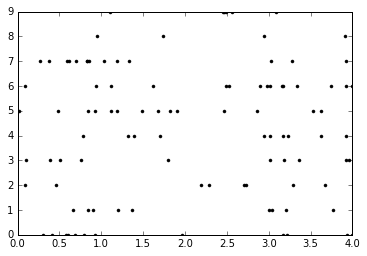

In [308]:
sys.run(1*np.random.standard_normal(np.array(sys.S.w).shape) )
sys.visualize()
print(sys.S.w)

INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


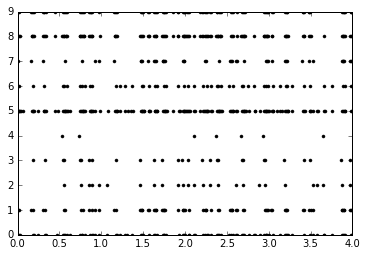

In [285]:
M1 = brian2.StateMonitor(sys.S, 'A_syn', record=True)
sys.net.add(M1)
sys.net.store()
sys.run(3*np.random.standard_normal(np.array(sys.S.w).shape) )
sys.visualize()

<synapses_1.w: array([  4.76696785,  12.27370471,  -3.98420382,  -8.05696498,
        -9.43067173,  -3.25950068,   5.12476108,  -0.0253352 ,
        -3.59988875,  11.16066614,  -2.64208154,   2.12250104,
        -0.69909333,   1.31473402,   3.4020935 ,  -6.81359814,
         1.21496166,  -1.45631598,  -4.6992783 ,  -5.89488943,
        -2.39647096,   1.85217742,  11.66454686,   2.17901615,
         2.50523625,   0.84234733,  -6.42434064,  -2.81875121,
         1.56001231,  -3.57094603,  -5.53881976,   3.81798983,
         1.07779785,  -0.66275596,   2.71131887,   4.03143882,
         7.84483208,   2.3186187 ,   0.10710468,  -2.42730548,
        -4.47515039,  -2.19183296,   1.2517581 ,   9.07956069,
         0.60682974,  -1.22501231, -11.01134996,   1.44255552,
        -0.63009558,   4.52626446,   3.68204841,  -0.22386671,
         2.18757325,   4.32586163,   5.53867931,   1.64185528,
        -0.31754522,   8.75772905,   0.90688893,  -1.11028582,
        -1.43976248,  -0.4918653 ,   0.7

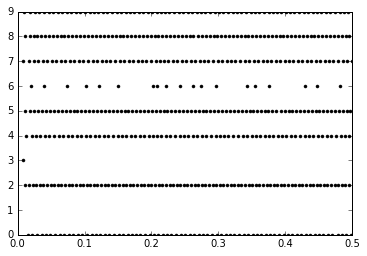

In [365]:
sys.run(annealer.s)
sys.visualize()
print(sys.S.w)

In [330]:
reload(slse)
frobloss = slse.FrobeniusLoss(targ, 1, 6.0)
frobloss.loss(annealer.out)

0


296.0

In [262]:
sys.S.w

<synapses_2.w: array([ 2.40545118,  1.53445147, -1.01387023, -2.68470074, -2.43815981,
       -1.47318049,  3.78996401,  1.82690631,  0.25728669,  1.95829694,
        0.20244331,  1.10582528,  3.31202199,  1.94822184, -1.03887676,
        4.85432534,  1.87584878, -2.50340638, -1.44583061, -2.80653273,
       -0.43938181,  0.66955053,  1.13040377, -3.74489001,  2.96038666,
        0.58071188, -0.85779984, -2.12981012, -2.66276338, -1.24864777,
       -0.23508738, -2.95905887, -1.91406501,  1.28373282,  4.35323615,
       -0.93289703,  3.30802135,  0.03437032, -3.09650546, -2.21732855,
       -4.20797176, -2.63037154, -2.89026628,  1.44465265,  1.01364613,
       -6.52088875, -2.81191475,  1.33982442, -1.56868886,  5.35902859,
       -1.46159744, -4.64341986,  2.16007573,  0.11988461, -1.12605389,
        4.03959219, -0.55601609, -0.75716424, -1.20997218, -5.04688783,
       -5.42555526, -1.00311616, -6.09070848, -1.63902922,  4.68457837,
       -3.90896027, -1.27257317, -1.09070894,  1.

In [257]:
sys.S.w

<synapses_1.w: array([ -3.27814039,   2.29013702,  -1.31245418,   0.11850548,
         1.56786035,   2.10634873,  -8.68807077,   2.69458621,
         3.15426016,  -0.96871194,  -1.71971747,   0.98740309,
         2.93448688,   2.10831864,  -1.24944937,  -4.19229188,
        -0.74252609,  -6.0472568 ,   1.28019988,  -2.59568823,
         0.5837301 ,   0.54482855,   2.33580105,  -3.5768219 ,
         7.29005507,  -2.44674298,  -0.72976822,   1.01725173,
        -0.91716052,  -1.30704026,  -1.22450731,   1.31994942,
         0.7797835 ,  -2.49318999,   2.12929975,  -2.06551711,
         4.55709099,  -1.85194403,  -2.93427214,   2.30789786,
         3.18002284,   2.05390189,   3.41428487,  -0.44076334,
        -0.98250961,   1.92169528,   2.32951159,   1.3517211 ,
         2.36880894,   2.19991262,  -3.98474524,  -0.23433653,
        -2.19829513,  -2.85490871,   1.92577781,   0.59356673,
        10.80443017,   1.55254608,   2.43672503,  -5.0521599 ,
         3.00791488,   0.0325329 ,  -3.6